In [2]:
import os, time, sys
import importlib
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
import clicfast2023.clicfast2023 as clicfast2023
import clicfast2023.analysis.interpreter as interpreter
import clicfast2023.analysis.event_builder as event_builder
import clicfast2023.analysis.fitfunctions as fitfunctions
import clicfast2023.analysis.data_loader as data_loader
datdir = '/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge'

## get flist

In [3]:
def get_flist(datdir):
    flist =[]
    for fname in np.sort(os.listdir(datdir)):
        if fname[-7:] == 'scan.h5':
            flist.append(fname)
    for i, fname in enumerate(flist):
        print(i, fname)
    return flist

## load data and get scruve

### default settings

In [4]:

importlib.reload(data_loader)
importlib.reload(fitfunctions)

fname = flist[0]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret, scurves = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-06 13:35:54,754 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_132632_th_hit.h5
2024-06-06 13:35:54,882 - root - [INFO    ] (MainThread) 0.12s hit=175266/175266 event=175266 ts=30600/30600
2024-06-06 13:35:54,883 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_132632_th_hit.h5
2024-06-06 13:35:54,904 - root - [INFO    ] (MainThread) pix=(1, 0) (1,) 20


0.80s 968142/968142 hit=175266 ts=30600 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_132632_th
('scan_param_id', 'timestamp', 'inj', 'cols')
['cols'] [( 1,) ( 2,) ( 5,) ( 6,) ( 9,) (10,) (13,) (14,) (17,) (18,) (21,) (22,)
 (25,) (26,)]


2024-06-06 13:35:54,959 - root - [INFO    ] (MainThread) pix=(1, 1) (1,) 22
2024-06-06 13:35:55,045 - root - [INFO    ] (MainThread) pix=(1, 2) (1,) 21
2024-06-06 13:35:55,077 - root - [INFO    ] (MainThread) pix=(1, 3) (1,) 18
2024-06-06 13:35:55,109 - root - [INFO    ] (MainThread) pix=(1, 4) (1,) 18
2024-06-06 13:35:55,140 - root - [INFO    ] (MainThread) pix=(1, 5) (1,) 21
2024-06-06 13:35:55,172 - root - [INFO    ] (MainThread) pix=(1, 6) (1,) 22
2024-06-06 13:35:55,204 - root - [INFO    ] (MainThread) pix=(1, 7) (1,) 19
2024-06-06 13:35:55,235 - root - [INFO    ] (MainThread) pix=(1, 8) (1,) 21
2024-06-06 13:35:55,266 - root - [INFO    ] (MainThread) pix=(1, 9) (1,) 22
2024-06-06 13:35:55,298 - root - [INFO    ] (MainThread) pix=(1, 10) (1,) 11
2024-06-06 13:35:55,326 - root - [INFO    ] (MainThread) pix=(1, 11) (1,) 21
2024-06-06 13:35:55,361 - root - [INFO    ] (MainThread) pix=(2, 0) (2,) 15
2024-06-06 13:35:55,393 - root - [INFO    ] (MainThread) pix=(2, 1) (2,) 15
2024-06-06

((22, 4, 0.11807693), (1, 10, 0.29136363))

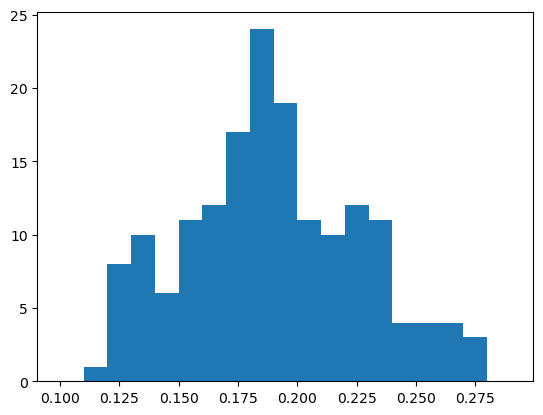

In [12]:
plt.hist(ret['quick_th'], bins=np.arange(0.1,0.3, 0.01));
ret[['col','comp','quick_th']][np.argmin(ret['quick_th'])], ret[['col','comp','quick_th']][np.argmax(ret['quick_th'])]

In [36]:
#fitfunctions.fit_scurve(scurves[0])
x, y = scurves[0][0], scurves[0][1]

fitfunctions.fit_scurve(x,y)

/home/thirono/Nextcloud-kit/workspace/clicfast2023/kit-gitlab/clicfast2023/analysis/fitfunctions.py:12: RuntimeWarning: divide by zero encountered in divide
  return 0.5 * A * erf((mu - x) / (np.sqrt(2) * sigma)) + 0.5 * A
/home/thirono/miniconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(100.0, 0.2150000035762787, 0.0, inf, inf, inf)

#### max and min pixels

In [14]:
fname = flist[1]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret1, scurves1 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)


2024-06-06 13:55:32,340 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_134410_th_hit.h5
2024-06-06 13:55:32,350 - root - [INFO    ] (MainThread) 0.00s hit=105941/105941 event=105941 ts=217400/217400
2024-06-06 13:55:32,350 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_134410_th_hit.h5


2024-06-06 13:55:32,366 - root - [INFO    ] (MainThread) pix=(1, 4) (0, 4, 1, 8) 13
2024-06-06 13:55:32,396 - root - [INFO    ] (MainThread) pix=(1, 4) (0, 4, 1, 10) 13
2024-06-06 13:55:32,425 - root - [INFO    ] (MainThread) pix=(1, 4) (0, 4, 1, 12) 11
2024-06-06 13:55:32,454 - root - [INFO    ] (MainThread) pix=(1, 4) (0, 4, 1, 16) 11
2024-06-06 13:55:32,482 - root - [INFO    ] (MainThread) pix=(22, 4) (0, 4, 22, 8) 12
2024-06-06 13:55:32,512 - root - [INFO    ] (MainThread) pix=(22, 4) (0, 4, 22, 10) 11
2024-06-06 13:55:32,539 - root - [INFO    ] (MainThread) pix=(22, 4) (0, 4, 22, 12) 12


0.01s 1181986/1181986 hit=105941 ts=217400 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_134410_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'comps', 'cols', 'IPDAC')
['tdac', 'comps', 'cols', 'IPDAC'] [(0,  4,  1,  8) (0,  4,  1, 10) (0,  4,  1, 12) (0,  4,  1, 16)
 (0,  4, 22,  8) (0,  4, 22, 10) (0,  4, 22, 12) (0,  4, 22, 16)
 (0, 10,  1,  8) (0, 10,  1, 10) (0, 10,  1, 12) (0, 10,  1, 16)
 (0, 10, 22,  8) (0, 10, 22, 10) (0, 10, 22, 12) (0, 10, 22, 16)
 (1,  4,  1,  8) (1,  4,  1, 10) (1,  4,  1, 12) (1,  4,  1, 16)
 (1,  4, 22,  8) (1,  4, 22, 10) (1,  4, 22, 12) (1,  4, 22, 16)
 (1, 10,  1,  8) (1, 10,  1, 10) (1, 10,  1, 12) (1, 10,  1, 16)
 (1, 10, 22,  8) (1, 10, 22, 10) (1, 10, 22, 12) (1, 10, 22, 16)
 (2,  4,  1,  8) (2,  4,  1, 10) (2,  4,  1, 12) (2,  4,  1, 16)
 (2,  4, 22,  8) (2,  4, 22, 10) (2,  4, 22, 12) (2,  4, 22, 16)
 (2, 10,  1,  8) (2, 10,  1, 10) (2, 10,  1, 12) (2, 10,  1, 16)
 (2, 10, 22,  8) (2, 10, 22, 10) (2, 10, 22, 12) 

2024-06-06 13:55:32,570 - root - [INFO    ] (MainThread) pix=(22, 4) (0, 4, 22, 16) 12
2024-06-06 13:55:32,598 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 8) 15
2024-06-06 13:55:32,628 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 10) 13
2024-06-06 13:55:32,658 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 12) 11
2024-06-06 13:55:32,685 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 16) 12
2024-06-06 13:55:32,780 - root - [INFO    ] (MainThread) pix=(22, 10) (0, 10, 22, 8) 11
2024-06-06 13:55:32,807 - root - [INFO    ] (MainThread) pix=(22, 10) (0, 10, 22, 10) 11
2024-06-06 13:55:32,834 - root - [INFO    ] (MainThread) pix=(22, 10) (0, 10, 22, 12) 10
2024-06-06 13:55:32,864 - root - [INFO    ] (MainThread) pix=(22, 10) (0, 10, 22, 16) 10
2024-06-06 13:55:32,895 - root - [INFO    ] (MainThread) pix=(1, 4) (1, 4, 1, 8) 13
2024-06-06 13:55:32,923 - root - [INFO    ] (MainThread) pix=(1, 4) (1, 4, 1, 10) 12
2024-06-06 13:55:32,952 - root - [INFO    

In [78]:
flist[1]

'20240606_134410_th_scan.h5'

Text(0.5, 1.0, 'IPDAC=10(orange) is the best')

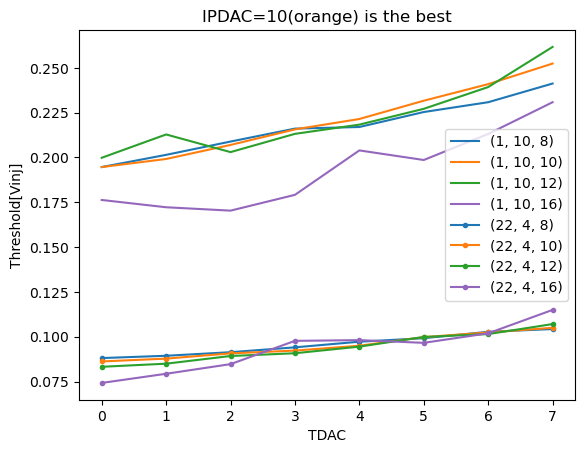

In [97]:
## ((22, 4, 0.11807693), (1, 10, 0.29136363))
uni = np.unique(ret1[['col', 'comp', 'IPDAC']])
for u in uni:
    if u['col']==22 and u['comp']==4:
        tmp = ret1[ret1[['col', 'comp', 'IPDAC']]==u]
        plt.plot(tmp['tdac'], tmp['quick_th'],'C{}.-'.format((u['IPDAC']//2)-4),  label=u)
    elif u['col']==1 and u['comp']==10:
        tmp = ret1[ret1[['col', 'comp', 'IPDAC']]==u]
        plt.plot(tmp['tdac'], tmp['quick_th'], 'C{}-'.format((u['IPDAC']//2)-4), label=u)
    #break
plt.legend()
plt.xlabel('TDAC')
plt.ylabel('Threshold[Vinj]')
plt.title("IPDAC=10(orange) is the best")

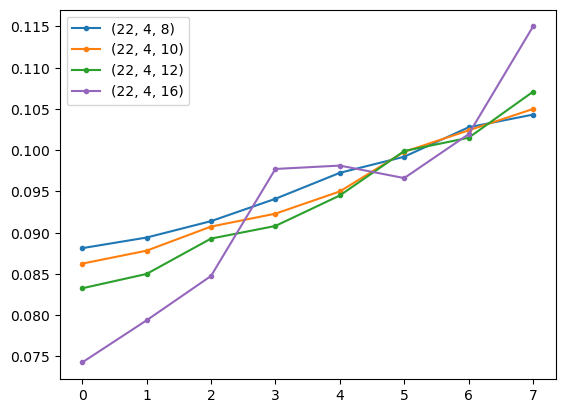

In [32]:
## ((22, 4, 0.11807693), (1, 10, 0.29136363))
uni = np.unique(ret1[['col', 'comp', 'IPDAC']])
for u in uni:
    if u['col']==22 and u['comp']==4:
        tmp = ret1[ret1[['col', 'comp', 'IPDAC']]==u]
        plt.plot(tmp['tdac'], tmp['quick_th'],'C{}.-'.format((u['IPDAC']//2)-4),  label=u)
    #elif u['col']==1 and u['comp']==10:
    #    tmp = ret1[ret1[['col', 'comp', 'IPDAC']]==u]
    #    plt.plot(tmp['tdac'], tmp['quick_th'], 'C{}-'.format((u['IPDAC']//2)-4), label=u)
    #break
plt.legend()

#### BLResP

In [61]:
fname = get_flist(datdir)[2]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret2, scurves2 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

fname = get_flist(datdir)[3]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret3, scurves3 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-06 14:37:26,086 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_141928_th_hit.h5
2024-06-06 14:37:26,092 - root - [INFO    ] (MainThread) 0.00s hit=38668/38668 event=38668 ts=77300/77300
2024-06-06 14:37:26,092 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_141928_th_hit.h5
2024-06-06 14:37:26,106 - root - [INFO    ] (MainThread) pix=(22, 4) (0, 4, 22, 1) 10
2024-06-06 14:37:26,137 - root - [INFO    ] (MainThread) pix=(22, 4) (0, 4, 22, 3) 10


0 20240606_132632_th_scan.h5
1 20240606_134410_th_scan.h5
2 20240606_141928_th_scan.h5
3 20240606_143001_th_scan.h5
0.00s 425283/425283 hit=38668 ts=77300 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_141928_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'comps', 'cols', 'BLResP')
['tdac', 'comps', 'cols', 'BLResP'] [(0, 4, 22,  1) (0, 4, 22,  3) (0, 4, 22,  7) (0, 4, 22, 15)
 (0, 4, 22, 31) (0, 4, 22, 63) (1, 4, 22,  1) (1, 4, 22,  3)
 (1, 4, 22,  7) (1, 4, 22, 15) (1, 4, 22, 31) (1, 4, 22, 63)
 (2, 4, 22,  1) (2, 4, 22,  3) (2, 4, 22,  7) (2, 4, 22, 15)
 (2, 4, 22, 31) (2, 4, 22, 63) (3, 4, 22,  1) (3, 4, 22,  3)
 (3, 4, 22,  7) (3, 4, 22, 15) (3, 4, 22, 31) (3, 4, 22, 63)
 (4, 4, 22,  1) (4, 4, 22,  3) (4, 4, 22,  7) (4, 4, 22, 15)
 (4, 4, 22, 31) (4, 4, 22, 63) (5, 4, 22,  1) (5, 4, 22,  3)
 (5, 4, 22,  7) (5, 4, 22, 15) (5, 4, 22, 31) (5, 4, 22, 63)
 (6, 4, 22,  1) (6, 4, 22,  3) (6, 4, 22,  7) (6, 4, 22, 15)
 (6, 4, 22, 31) (6, 4, 22, 63) (7, 4, 22

2024-06-06 14:37:26,300 - root - [INFO    ] (MainThread) pix=(22, 4) (0, 4, 22, 7) 11
2024-06-06 14:37:26,327 - root - [INFO    ] (MainThread) pix=(22, 4) (0, 4, 22, 15) 10
2024-06-06 14:37:26,357 - root - [INFO    ] (MainThread) pix=(22, 4) (0, 4, 22, 31) 14
2024-06-06 14:37:26,386 - root - [INFO    ] (MainThread) pix=(22, 4) (0, 4, 22, 63) 13
2024-06-06 14:37:26,414 - root - [INFO    ] (MainThread) pix=(22, 4) (1, 4, 22, 1) 9
2024-06-06 14:37:26,442 - root - [INFO    ] (MainThread) pix=(22, 4) (1, 4, 22, 3) 10
2024-06-06 14:37:26,472 - root - [INFO    ] (MainThread) pix=(22, 4) (1, 4, 22, 7) 11
2024-06-06 14:37:26,499 - root - [INFO    ] (MainThread) pix=(22, 4) (1, 4, 22, 15) 12
2024-06-06 14:37:26,527 - root - [INFO    ] (MainThread) pix=(22, 4) (1, 4, 22, 31) 15
2024-06-06 14:37:26,556 - root - [INFO    ] (MainThread) pix=(22, 4) (1, 4, 22, 63) 15
2024-06-06 14:37:26,586 - root - [INFO    ] (MainThread) pix=(22, 4) (2, 4, 22, 1) 10
2024-06-06 14:37:26,615 - root - [INFO    ] (Main

0 20240606_132632_th_scan.h5
1 20240606_134410_th_scan.h5
2 20240606_141928_th_scan.h5
3 20240606_143001_th_scan.h5
0.01s 522966/522966 hit=44106 ts=100800 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_143001_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'comps', 'cols', 'BLResP')
['tdac', 'comps', 'cols', 'BLResP'] [(0, 10, 1,  1) (0, 10, 1,  3) (0, 10, 1,  7) (0, 10, 1, 15)
 (0, 10, 1, 31) (0, 10, 1, 63) (1, 10, 1,  1) (1, 10, 1,  3)
 (1, 10, 1,  7) (1, 10, 1, 15) (1, 10, 1, 31) (1, 10, 1, 63)
 (2, 10, 1,  1) (2, 10, 1,  3) (2, 10, 1,  7) (2, 10, 1, 15)
 (2, 10, 1, 31) (2, 10, 1, 63) (3, 10, 1,  1) (3, 10, 1,  3)
 (3, 10, 1,  7) (3, 10, 1, 15) (3, 10, 1, 31) (3, 10, 1, 63)
 (4, 10, 1,  1) (4, 10, 1,  3) (4, 10, 1,  7) (4, 10, 1, 15)
 (4, 10, 1, 31) (4, 10, 1, 63) (5, 10, 1,  1) (5, 10, 1,  3)
 (5, 10, 1,  7) (5, 10, 1, 15) (5, 10, 1, 31) (5, 10, 1, 63)
 (6, 10, 1,  1) (6, 10, 1,  3) (6, 10, 1,  7) (6, 10, 1, 15)
 (6, 10, 1, 31) (6, 10, 1, 63) (7, 10, 

2024-06-06 14:37:27,875 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 7) 13
2024-06-06 14:37:27,905 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 15) 16
2024-06-06 14:37:27,935 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 31) 21
2024-06-06 14:37:27,962 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 63) 21
2024-06-06 14:37:27,993 - root - [INFO    ] (MainThread) pix=(1, 10) (1, 10, 1, 1) 10
2024-06-06 14:37:28,022 - root - [INFO    ] (MainThread) pix=(1, 10) (1, 10, 1, 3) 13
2024-06-06 14:37:28,050 - root - [INFO    ] (MainThread) pix=(1, 10) (1, 10, 1, 7) 16
2024-06-06 14:37:28,081 - root - [INFO    ] (MainThread) pix=(1, 10) (1, 10, 1, 15) 16
2024-06-06 14:37:28,111 - root - [INFO    ] (MainThread) pix=(1, 10) (1, 10, 1, 31) 19
2024-06-06 14:37:28,143 - root - [INFO    ] (MainThread) pix=(1, 10) (1, 10, 1, 63) 18
2024-06-06 14:37:28,174 - root - [INFO    ] (MainThread) pix=(1, 10) (2, 10, 1, 1) 12
2024-06-06 14:37:28,203 - root - [INFO    ] (Mai

Text(0.5, 1.0, 'Larger BLRes, higher threshold')

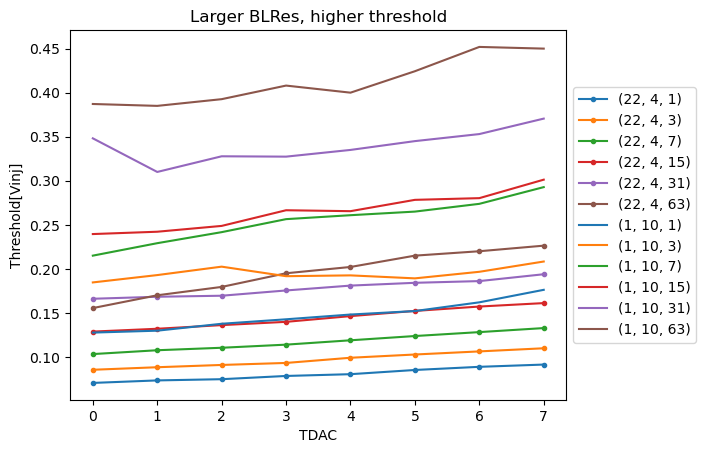

In [76]:
## ((22, 4, 0.11807693), (1, 10, 0.29136363))
fig, ax = plt.subplots()
uni = np.unique(ret2[['col', 'comp', 'BLResP']])

for u_i, u in enumerate(uni):

    tmp = ret2[ret2[['col', 'comp', 'BLResP']]==u]
    ax.plot(tmp['tdac'], tmp['quick_th'],'C{}.-'.format(u_i) ,label=u)


uni = np.unique(ret3[['col', 'comp', 'BLResP']])
for u_i, u in enumerate(uni):

    tmp = ret3[ret3[['col', 'comp', 'BLResP']]==u]
    ax.plot(tmp['tdac'], tmp['quick_th'],'C{}-'.format(u_i) ,label=u)

ax.legend()
ax.set_xlabel('TDAC')
ax.set_ylabel('Threshold[Vinj]')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Larger BLRes, higher threshold')

### Change to VP1=VP2=20 and VNCaslc

In [79]:
fname = get_flist(datdir)[4]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret4, scurves4 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-06 16:19:51,574 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_161707_th_hit.h5
2024-06-06 16:19:51,591 - root - [INFO    ] (MainThread) 0.01s hit=338169/338169 event=338169 ts=57600/57600
2024-06-06 16:19:51,592 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_161707_th_hit.h5


2024-06-06 16:19:51,625 - root - [INFO    ] (MainThread) pix=(1, 0) (1,) 38
2024-06-06 16:19:51,660 - root - [INFO    ] (MainThread) pix=(1, 1) (1,) 45
2024-06-06 16:19:51,689 - root - [INFO    ] (MainThread) pix=(1, 2) (1,) 42
2024-06-06 16:19:51,719 - root - [INFO    ] (MainThread) pix=(1, 3) (1,) 30


0 20240606_132632_th_scan.h5
1 20240606_134410_th_scan.h5
2 20240606_141928_th_scan.h5
3 20240606_143001_th_scan.h5
4 20240606_161707_th_scan.h5
0.02s 1863662/1863662 hit=338169 ts=57600 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_161707_th
('scan_param_id', 'timestamp', 'inj', 'cols')
['cols'] [( 1,) ( 2,) ( 5,) ( 6,) ( 9,) (10,) (13,) (14,) (17,) (18,) (21,) (22,)
 (25,) (26,)]


2024-06-06 16:19:51,747 - root - [INFO    ] (MainThread) pix=(1, 4) (1,) 36
2024-06-06 16:19:51,777 - root - [INFO    ] (MainThread) pix=(1, 5) (1,) 45
2024-06-06 16:19:51,804 - root - [INFO    ] (MainThread) pix=(1, 6) (1,) 45
2024-06-06 16:19:51,832 - root - [INFO    ] (MainThread) pix=(1, 7) (1,) 39
2024-06-06 16:19:51,862 - root - [INFO    ] (MainThread) pix=(1, 8) (1,) 42
2024-06-06 16:19:51,890 - root - [INFO    ] (MainThread) pix=(1, 9) (1,) 45
2024-06-06 16:19:51,917 - root - [INFO    ] (MainThread) pix=(1, 10) (1,) 14
2024-06-06 16:19:51,948 - root - [INFO    ] (MainThread) pix=(1, 11) (1,) 42
2024-06-06 16:19:51,983 - root - [INFO    ] (MainThread) pix=(2, 0) (2,) 33
2024-06-06 16:19:52,012 - root - [INFO    ] (MainThread) pix=(2, 1) (2,) 32
2024-06-06 16:19:52,042 - root - [INFO    ] (MainThread) pix=(2, 2) (2,) 31
2024-06-06 16:19:52,070 - root - [INFO    ] (MainThread) pix=(2, 3) (2,) 25
2024-06-06 16:19:52,099 - root - [INFO    ] (MainThread) pix=(2, 4) (2,) 28
2024-06-06

min (26, 1, 0.237)
max (1, 10, 0.6702941)


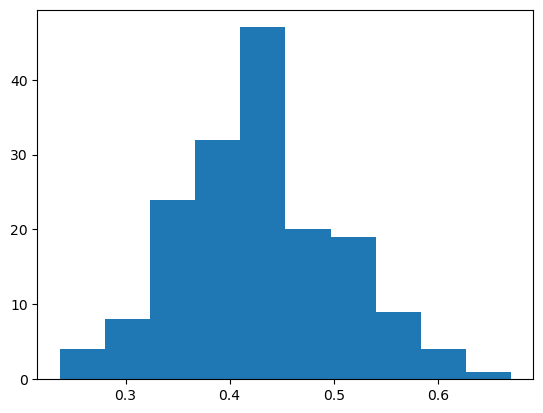

In [86]:
#plt.hist(ret['quick_th'], bins=np.arange(0.1,0.3, 0.01));
#ret[['col','comp','quick_th']][np.argmin(ret['quick_th'])], 
#ret[['col','comp','quick_th']][np.argmax(ret['quick_th'])]

plt.hist(ret4['quick_th']) #, bins=np.arange(0.1,0.3, 0.01));
print('min',ret4[['col','comp','quick_th']][np.argmin(ret4['quick_th'])])
print('max',ret4[['col','comp','quick_th']][np.argmax(ret4['quick_th'])])

### 5. TDAC of 10,1

In [89]:
fname = get_flist(datdir)[5]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret5, scurves5 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-06 16:29:35,288 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_162729_th_hit.h5
2024-06-06 16:29:35,292 - root - [INFO    ] (MainThread) 0.00s hit=8716/8716 event=8716 ts=21800/21800
2024-06-06 16:29:35,292 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_162729_th_hit.h5
2024-06-06 16:29:35,305 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1) 17
2024-06-06 16:29:35,337 - root - [INFO    ] (MainThread) pix=(1, 10) (1, 10, 1) 19
2024-06-06 16:29:35,369 - root - [INFO    ] (MainThread) pix=(1, 10) (2, 10, 1) 22
2024-06-06 16:29:35,396 - root - [INFO    ] (MainThread) pix=(1, 10) (3, 10, 1) 22
2024-06-06 16:29:35,428 - root - [INFO    ] (MainThread) pix=(1, 10) (4, 10, 1) 24
2024-06-06 16:29:35,455 - root - [INFO    ] (MainThread) pix=(1, 10) (5, 10, 1) 26
2024-06-06 16:29:35,483 - root - [INFO    ] (MainThread) pix=(1, 10) (6, 10, 1)

0 20240606_132632_th_scan.h5
1 20240606_134410_th_scan.h5
2 20240606_141928_th_scan.h5
3 20240606_143001_th_scan.h5
4 20240606_161707_th_scan.h5
5 20240606_162729_th_scan.h5
0.00s 108991/108991 hit=8716 ts=21800 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240606_162729_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'comps', 'cols')
['tdac', 'comps', 'cols'] [(0, 10, 1) (1, 10, 1) (2, 10, 1) (3, 10, 1) (4, 10, 1) (5, 10, 1)
 (6, 10, 1) (7, 10, 1)]


2024-06-06 16:29:35,513 - root - [INFO    ] (MainThread) pix=(1, 10) (7, 10, 1) 18


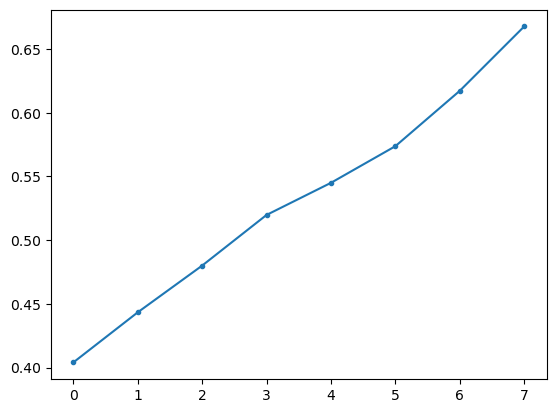

In [96]:
plt.plot(ret5['tdac'], ret5['quick_th'], '.-')

### 6. VP1=VP2=10 threhold = 0x82

In [8]:
fname = get_flist(datdir)[6]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret5, scurves5 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 15:23:36,981 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/test2/20240604_151350_th_hit.h5
2024-06-04 15:23:36,985 - root - [INFO    ] (MainThread) 0.00s hit=1069/1069 event=1069 ts=5400/5400
2024-06-04 15:23:36,985 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/test2/20240604_151350_th_hit.h5
2024-06-04 15:23:36,998 - root - [INFO    ] (MainThread) pix=(1, 11) (0,) 12


0.00s 21546/21546 hit=1069 ts=5400 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/test2/20240604_151350_th
('scan_param_id', 'timestamp', 'inj', 'tdac')
['tdac'] [(0,) (7,)]


2024-06-04 15:23:37,030 - root - [INFO    ] (MainThread) pix=(1, 11) (7,) 10


### 7. VPComp=40

In [8]:
fname = get_flist(datdir)[7]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret7, scurves7= data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-07 13:10:44,435 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240607_115234_th_hit.h5
2024-06-07 13:10:44,444 - root - [INFO    ] (MainThread) 0.00s hit=104027/104027 event=104027 ts=202400/202400
2024-06-07 13:10:44,444 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240607_115234_th_hit.h5
2024-06-07 13:10:44,460 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 2) 13
2024-06-07 13:10:44,495 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 6) 13
2024-06-07 13:10:44,524 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 10) 12
2024-06-07 13:10:44,552 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 14) 12
2024-06-07 13:10:44,580 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 18) 12
2024-06-07 13:10:44,608 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 22) 11


0 20240606_132632_th_scan.h5
1 20240606_134410_th_scan.h5
2 20240606_141928_th_scan.h5
3 20240606_143001_th_scan.h5
4 20240606_161707_th_scan.h5
5 20240606_162729_th_scan.h5
6 20240606_164106_th_scan.h5
7 20240607_115234_th_scan.h5
0.01s 1127409/1127409 hit=104027 ts=202400 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/collarge/20240607_115234_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'comps', 'cols', 'IPDAC')
['tdac', 'comps', 'cols', 'IPDAC'] [(0, 10, 1,  2) (0, 10, 1,  6) (0, 10, 1, 10) (0, 10, 1, 14)
 (0, 10, 1, 18) (0, 10, 1, 22) (0, 10, 1, 26) (0, 10, 1, 30)
 (0, 10, 1, 34) (0, 10, 1, 38) (0, 10, 1, 42) (0, 10, 1, 46)
 (0, 10, 1, 50) (0, 10, 1, 54) (0, 10, 1, 58) (0, 10, 1, 62)
 (1, 10, 1,  2) (1, 10, 1,  6) (1, 10, 1, 10) (1, 10, 1, 14)
 (1, 10, 1, 18) (1, 10, 1, 22) (1, 10, 1, 26) (1, 10, 1, 30)
 (1, 10, 1, 34) (1, 10, 1, 38) (1, 10, 1, 42) (1, 10, 1, 46)
 (1, 10, 1, 50) (1, 10, 1, 54) (1, 10, 1, 58) (1, 10, 1, 62)
 (2, 10, 1,  2) (2, 10, 1,  6) (2, 10, 1, 10

2024-06-07 13:10:44,639 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 26) 11
2024-06-07 13:10:44,673 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 30) 10
2024-06-07 13:10:44,707 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 34) 11
2024-06-07 13:10:44,735 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 38) 11
2024-06-07 13:10:44,763 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 42) 11
2024-06-07 13:10:44,790 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 46) 11
2024-06-07 13:10:44,819 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 50) 12
2024-06-07 13:10:45,060 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 54) 14
2024-06-07 13:10:45,095 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 58) 15
2024-06-07 13:10:45,124 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 10, 1, 62) 13
2024-06-07 13:10:45,152 - root - [INFO    ] (MainThread) pix=(1, 10) (1, 10, 1, 2) 12
2024-06-07 13:10:45,186 - root - [INFO    ] 

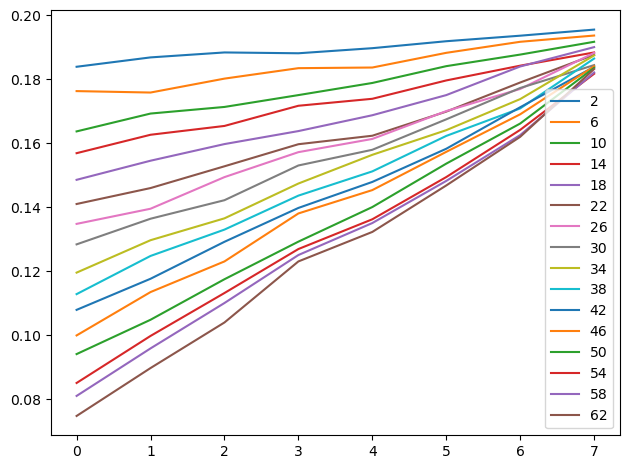

In [24]:
uni = np.unique(ret7[['col', 'comp', 'IPDAC']])
fig, ax = plt.subplots()
for u in uni:
    tmp = ret7[ret7[['col', 'comp', 'IPDAC']]==u]
    ax.plot(tmp['tdac'], tmp['quick_th'], label=u['IPDAC'])
ax.legend(loc='lower right')
fig.tight_layout()

### auto HV-50

In [22]:
fname = flist[7]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret50, scurves50= data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 15:38:37,504 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/test2/20240604_153731_th_hit.h5
2024-06-04 15:38:37,508 - root - [INFO    ] (MainThread) 0.00s hit=3272/3272 event=3272 ts=5000/5000
2024-06-04 15:38:37,509 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/test2/20240604_153731_th_hit.h5
2024-06-04 15:38:37,523 - root - [INFO    ] (MainThread) pix=(1, 11) (0,) 21
2024-06-04 15:38:37,611 - root - [INFO    ] (MainThread) pix=(1, 11) (7,) 22


0.00s 31363/31363 hit=3272 ts=5000 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/test2/20240604_153731_th
('scan_param_id', 'timestamp', 'inj', 'tdac')
['tdac'] [(0,) (7,)]


### auto HV-50 2nd

In [23]:
fname = flist[8]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret501, scurves501= data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 15:38:39,240 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/test2/20240604_153749_th_hit.h5
2024-06-04 15:38:39,245 - root - [INFO    ] (MainThread) 0.00s hit=3190/3190 event=3190 ts=4900/4900
2024-06-04 15:38:39,245 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/test2/20240604_153749_th_hit.h5
2024-06-04 15:38:39,259 - root - [INFO    ] (MainThread) pix=(1, 11) (0,) 20
2024-06-04 15:38:39,298 - root - [INFO    ] (MainThread) pix=(1, 11) (7,) 21


0.00s 30651/30651 hit=3190 ts=4900 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/test2/20240604_153749_th
('scan_param_id', 'timestamp', 'inj', 'tdac')
['tdac'] [(0,) (7,)]


### auto HV-50 3rd

In [27]:
fname = flist[9]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret502, scurves502 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 15:39:48,769 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/test2/20240604_153805_th_hit.h5
2024-06-04 15:39:48,773 - root - [INFO    ] (MainThread) 0.00s hit=3189/3189 event=3189 ts=4900/4900
2024-06-04 15:39:48,773 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/test2/20240604_153805_th_hit.h5
2024-06-04 15:39:48,787 - root - [INFO    ] (MainThread) pix=(1, 11) (0,) 20
2024-06-04 15:39:48,820 - root - [INFO    ] (MainThread) pix=(1, 11) (7,) 20


0.00s 30649/30649 hit=3189 ts=4900 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/test2/20240604_153805_th
('scan_param_id', 'timestamp', 'inj', 'tdac')
['tdac'] [(0,) (7,)]


## Plot 

2024-06-04 15:40:44,405 - matplotlib.legend - [WARNING ] (MainThread) No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 0.6)

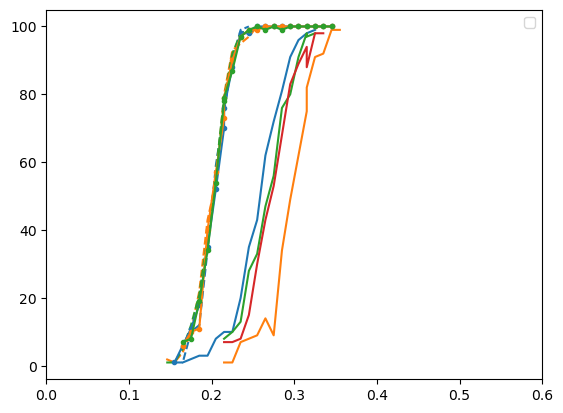

In [31]:
#for i, r in enumerate(ret):
i = 0
plt.plot(scurves[i][0], scurves[i][1], 'C0')
plt.plot(scurves1[i][0], scurves1[i][1], 'C1')
plt.plot(scurves2[i][0], scurves2[i][1], 'C2')
plt.plot(scurves3[i][0], scurves3[i][1], 'C3')

plt.plot(scurvesF[i][0], scurvesF[i][1], 'C0--')
plt.plot(scurvesF1[i][0], scurvesF1[i][1], 'C1--')
plt.plot(scurvesF2[i][0], scurvesF2[i][1], 'C2--')

plt.plot(scurves50[i][0], scurves50[i][1], 'C0.-')
plt.plot(scurves501[i][0], scurves501[i][1], 'C1.-')
plt.plot(scurves502[i][0], scurves502[i][1], 'C2.-')


plt.legend()
plt.xlim(0,0.6)

## Conclusion

HV must be hight enough (e.g. -50V)

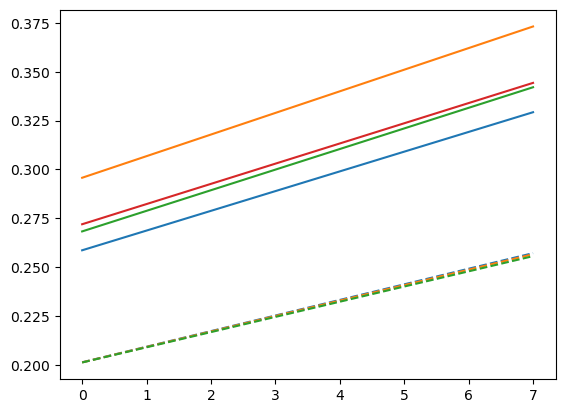

In [14]:
plt.plot(ret['tdac'], ret['quick_th'], 'C0')
plt.plot(ret1['tdac'], ret1['quick_th'], 'C1')
plt.plot(ret2['tdac'], ret2['quick_th'], 'C2')
plt.plot(ret3['tdac'], ret3['quick_th'], 'C3')

plt.plot(retF['tdac'], retF['quick_th'], 'C0--')
plt.plot(retF1['tdac'], retF1['quick_th'], 'C1--')
plt.plot(retF2['tdac'], retF2['quick_th'], 'C2--')



# TDAC

In [60]:
datdir = '/home/thirono/cernbox/clicfast2022/tdac07'

flist =[]
for fname in np.sort(os.listdir(datdir)):
    if fname[-7:] == 'scan.h5':
        flist.append(fname)
for i, fname in enumerate(flist):
    print(i, fname)

0 20240604_154659_th_scan.h5
1 20240604_161247_th_scan.h5
2 20240604_164802_th_scan.h5
3 20240604_165635_th_scan.h5
4 20240604_171549_th_scan.h5
5 20240604_173312_th_scan.h5
6 20240604_174029_th_scan.h5
7 20240604_180255_th_scan.h5
8 20240604_181855_th_scan.h5
9 20240604_182406_th_scan.h5


### IPDAC=8 (default)

In [47]:
fname = flist[0]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret, scurves = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 16:31:42,942 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/tdac07/20240604_154659_th_hit.h5
2024-06-04 16:31:43,002 - root - [INFO    ] (MainThread) 0.05s hit=1405866/1405866 event=1405866 ts=201400/201400
2024-06-04 16:31:43,002 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/tdac07/20240604_154659_th_hit.h5
2024-06-04 16:31:43,050 - root - [INFO    ] (MainThread) pix=(1, 0) (0, 1) 55
2024-06-04 16:31:43,079 - root - [INFO    ] (MainThread) pix=(1, 1) (0, 1) 57
2024-06-04 16:31:43,107 - root - [INFO    ] (MainThread) pix=(1, 2) (0, 1) 57
2024-06-04 16:31:43,135 - root - [INFO    ] (MainThread) pix=(1, 3) (0, 1) 54


0.09s 7633606/7633606 hit=1405866 ts=201400 trig=0
/home/thirono/cernbox/clicfast2022/tdac07/20240604_154659_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'cols')
['tdac', 'cols'] [(0,  1) (0,  2) (0,  3) (0,  4) (0,  5) (0,  6) (0,  7) (0,  8) (0,  9)
 (0, 10) (0, 11) (0, 12) (0, 13) (0, 14) (0, 15) (0, 16) (0, 17) (0, 18)
 (0, 19) (0, 20) (0, 21) (0, 22) (0, 23) (0, 24) (0, 25) (0, 26) (0, 27)
 (0, 28) (7,  1) (7,  2) (7,  3) (7,  4) (7,  5) (7,  6) (7,  7) (7,  8)
 (7,  9) (7, 10) (7, 11) (7, 12) (7, 13) (7, 14) (7, 15) (7, 16) (7, 17)
 (7, 18) (7, 19) (7, 20) (7, 21) (7, 22) (7, 23) (7, 24) (7, 25) (7, 26)
 (7, 27) (7, 28)]


2024-06-04 16:31:43,163 - root - [INFO    ] (MainThread) pix=(1, 4) (0, 1) 55
2024-06-04 16:31:43,191 - root - [INFO    ] (MainThread) pix=(1, 5) (0, 1) 55
2024-06-04 16:31:43,220 - root - [INFO    ] (MainThread) pix=(1, 6) (0, 1) 58
2024-06-04 16:31:43,248 - root - [INFO    ] (MainThread) pix=(1, 7) (0, 1) 54
2024-06-04 16:31:43,276 - root - [INFO    ] (MainThread) pix=(1, 8) (0, 1) 57
2024-06-04 16:31:43,304 - root - [INFO    ] (MainThread) pix=(1, 9) (0, 1) 58
2024-06-04 16:31:43,332 - root - [INFO    ] (MainThread) pix=(1, 11) (0, 1) 55
2024-06-04 16:31:43,370 - root - [INFO    ] (MainThread) pix=(2, 0) (0, 2) 24
2024-06-04 16:31:43,398 - root - [INFO    ] (MainThread) pix=(2, 1) (0, 2) 23
2024-06-04 16:31:43,424 - root - [INFO    ] (MainThread) pix=(2, 2) (0, 2) 24
2024-06-04 16:31:43,452 - root - [INFO    ] (MainThread) pix=(2, 3) (0, 2) 24
2024-06-04 16:31:43,479 - root - [INFO    ] (MainThread) pix=(2, 4) (0, 2) 24
2024-06-04 16:31:43,505 - root - [INFO    ] (MainThread) pix=(2

### IPDAC=15

In [49]:
fname = flist[1]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret15, scurves15 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)


2024-06-04 16:32:14,257 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/tdac07/20240604_161247_th_hit.h5
2024-06-04 16:32:14,313 - root - [INFO    ] (MainThread) 0.05s hit=1397470/1397470 event=1397470 ts=215300/215300
2024-06-04 16:32:14,314 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/tdac07/20240604_161247_th_hit.h5
2024-06-04 16:32:14,364 - root - [INFO    ] (MainThread) pix=(1, 0) (0, 1) 68
2024-06-04 16:32:14,394 - root - [INFO    ] (MainThread) pix=(1, 1) (0, 1) 68
2024-06-04 16:32:14,424 - root - [INFO    ] (MainThread) pix=(1, 2) (0, 1) 70
2024-06-04 16:32:14,454 - root - [INFO    ] (MainThread) pix=(1, 3) (0, 1) 54


0.09s 7633322/7633322 hit=1397470 ts=215300 trig=0
/home/thirono/cernbox/clicfast2022/tdac07/20240604_161247_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'cols')
['tdac', 'cols'] [(0,  1) (0,  2) (0,  3) (0,  4) (0,  5) (0,  6) (0,  7) (0,  8) (0,  9)
 (0, 10) (0, 11) (0, 12) (0, 13) (0, 14) (0, 15) (0, 16) (0, 17) (0, 18)
 (0, 19) (0, 20) (0, 21) (0, 22) (0, 23) (0, 24) (0, 25) (0, 26) (0, 27)
 (0, 28) (7,  1) (7,  2) (7,  3) (7,  4) (7,  5) (7,  6) (7,  7) (7,  8)
 (7,  9) (7, 10) (7, 11) (7, 12) (7, 13) (7, 14) (7, 15) (7, 16) (7, 17)
 (7, 18) (7, 19) (7, 20) (7, 21) (7, 22) (7, 23) (7, 24) (7, 25) (7, 26)
 (7, 27) (7, 28)]


2024-06-04 16:32:14,483 - root - [INFO    ] (MainThread) pix=(1, 4) (0, 1) 61
2024-06-04 16:32:14,513 - root - [INFO    ] (MainThread) pix=(1, 5) (0, 1) 62
2024-06-04 16:32:14,543 - root - [INFO    ] (MainThread) pix=(1, 6) (0, 1) 70
2024-06-04 16:32:14,572 - root - [INFO    ] (MainThread) pix=(1, 7) (0, 1) 61
2024-06-04 16:32:14,602 - root - [INFO    ] (MainThread) pix=(1, 8) (0, 1) 71
2024-06-04 16:32:14,632 - root - [INFO    ] (MainThread) pix=(1, 9) (0, 1) 71
2024-06-04 16:32:14,662 - root - [INFO    ] (MainThread) pix=(1, 10) (0, 1) 20
2024-06-04 16:32:14,689 - root - [INFO    ] (MainThread) pix=(1, 11) (0, 1) 66
2024-06-04 16:32:14,730 - root - [INFO    ] (MainThread) pix=(2, 0) (0, 2) 28
2024-06-04 16:32:14,758 - root - [INFO    ] (MainThread) pix=(2, 1) (0, 2) 24
2024-06-04 16:32:14,785 - root - [INFO    ] (MainThread) pix=(2, 2) (0, 2) 27
2024-06-04 16:32:14,813 - root - [INFO    ] (MainThread) pix=(2, 3) (0, 2) 25
2024-06-04 16:32:14,841 - root - [INFO    ] (MainThread) pix=(

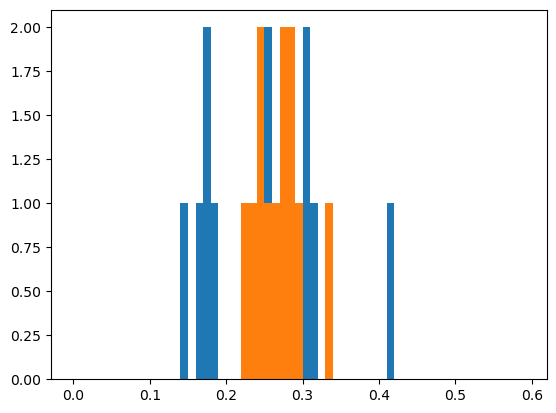

In [55]:
bins=np.arange(0,0.6,0.01)
hist0 = plt.hist(ret15[np.bitwise_and(ret15['tdac']==0, ret15['col']==3)]['quick_th'], bins=bins)
hist0 = plt.hist(ret15[np.bitwise_and(ret15['tdac']==7, ret15['col']==3)]['quick_th'], bins=bins)


### all tdac col=3 (small pix), IPDAC=15

In [5]:
fname = flist[2]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret3, scurves3 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 16:50:25,911 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/tdac07/20240604_164802_th_hit.h5
2024-06-04 16:50:25,923 - root - [INFO    ] (MainThread) 0.01s hit=181877/181877 event=181877 ts=27800/27800
2024-06-04 16:50:25,924 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/tdac07/20240604_164802_th_hit.h5
2024-06-04 16:50:25,949 - root - [INFO    ] (MainThread) pix=(3, 0) (0, 3) 26


2024-06-04 16:50:25,979 - root - [INFO    ] (MainThread) pix=(3, 1) (0, 3) 24
2024-06-04 16:50:26,008 - root - [INFO    ] (MainThread) pix=(3, 2) (0, 3) 38
2024-06-04 16:50:26,039 - root - [INFO    ] (MainThread) pix=(3, 3) (0, 3) 36
2024-06-04 16:50:26,069 - root - [INFO    ] (MainThread) pix=(3, 4) (0, 3) 20
2024-06-04 16:50:26,101 - root - [INFO    ] (MainThread) pix=(3, 5) (0, 3) 20


0.01s 992791/992791 hit=181877 ts=27800 trig=0
/home/thirono/cernbox/clicfast2022/tdac07/20240604_164802_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'cols')
['tdac', 'cols'] [(0, 3) (1, 3) (2, 3) (3, 3) (4, 3) (5, 3) (6, 3) (7, 3)]


2024-06-04 16:50:26,133 - root - [INFO    ] (MainThread) pix=(3, 6) (0, 3) 34
2024-06-04 16:50:26,164 - root - [INFO    ] (MainThread) pix=(3, 7) (0, 3) 26
2024-06-04 16:50:26,193 - root - [INFO    ] (MainThread) pix=(3, 8) (0, 3) 35
2024-06-04 16:50:26,223 - root - [INFO    ] (MainThread) pix=(3, 9) (0, 3) 9
2024-06-04 16:50:26,253 - root - [INFO    ] (MainThread) pix=(3, 10) (0, 3) 22
2024-06-04 16:50:26,282 - root - [INFO    ] (MainThread) pix=(3, 11) (0, 3) 34
2024-06-04 16:50:26,323 - root - [INFO    ] (MainThread) pix=(3, 0) (1, 3) 33
2024-06-04 16:50:26,353 - root - [INFO    ] (MainThread) pix=(3, 1) (1, 3) 31
2024-06-04 16:50:26,382 - root - [INFO    ] (MainThread) pix=(3, 2) (1, 3) 40
2024-06-04 16:50:26,413 - root - [INFO    ] (MainThread) pix=(3, 3) (1, 3) 38
2024-06-04 16:50:26,445 - root - [INFO    ] (MainThread) pix=(3, 4) (1, 3) 23
2024-06-04 16:50:26,473 - root - [INFO    ] (MainThread) pix=(3, 5) (1, 3) 25
2024-06-04 16:50:26,502 - root - [INFO    ] (MainThread) pix=(3

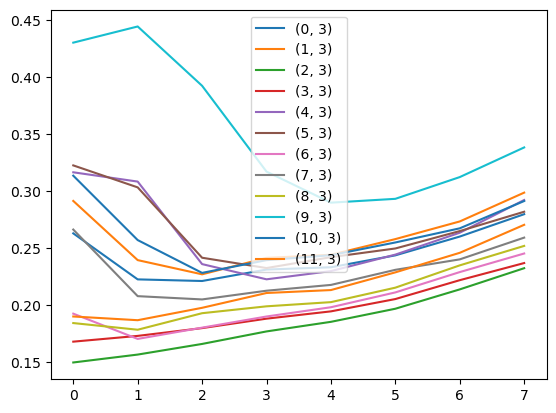

In [8]:
bins=np.arange(0,0.6,0.01)
uni = np.unique(ret3[['comp','col']])
for u in uni:
   tmp=ret3[ret3[['comp','col']]==u]
   plt.plot(tmp['tdac'], tmp['quick_th'], '-', label=u)
plt.legend()

### all tdac col=3 (small pix), IPDAC=8(defualt)

In [12]:
fname = flist[3]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret3_8, scurves3_8 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 16:59:57,470 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/tdac07/20240604_165635_th_hit.h5
2024-06-04 16:59:57,479 - root - [INFO    ] (MainThread) 0.01s hit=135203/135203 event=135203 ts=23800/23800
2024-06-04 16:59:57,480 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/tdac07/20240604_165635_th_hit.h5
2024-06-04 16:59:57,502 - root - [INFO    ] (MainThread) pix=(3, 0) (0, 3) 20


2024-06-04 16:59:57,534 - root - [INFO    ] (MainThread) pix=(3, 1) (0, 3) 19
2024-06-04 16:59:57,565 - root - [INFO    ] (MainThread) pix=(3, 2) (0, 3) 25
2024-06-04 16:59:57,592 - root - [INFO    ] (MainThread) pix=(3, 3) (0, 3) 25
2024-06-04 16:59:57,621 - root - [INFO    ] (MainThread) pix=(3, 4) (0, 3) 20
2024-06-04 16:59:57,652 - root - [INFO    ] (MainThread) pix=(3, 5) (0, 3) 19


0.01s 747422/747422 hit=135203 ts=23800 trig=0
/home/thirono/cernbox/clicfast2022/tdac07/20240604_165635_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'cols')
['tdac', 'cols'] [(0, 3) (1, 3) (2, 3) (3, 3) (4, 3) (5, 3) (6, 3) (7, 3)]


2024-06-04 16:59:57,682 - root - [INFO    ] (MainThread) pix=(3, 6) (0, 3) 25
2024-06-04 16:59:57,710 - root - [INFO    ] (MainThread) pix=(3, 7) (0, 3) 21
2024-06-04 16:59:57,912 - root - [INFO    ] (MainThread) pix=(3, 8) (0, 3) 23
2024-06-04 16:59:57,939 - root - [INFO    ] (MainThread) pix=(3, 9) (0, 3) 10
2024-06-04 16:59:57,966 - root - [INFO    ] (MainThread) pix=(3, 10) (0, 3) 19
2024-06-04 16:59:57,997 - root - [INFO    ] (MainThread) pix=(3, 11) (0, 3) 22
2024-06-04 16:59:58,033 - root - [INFO    ] (MainThread) pix=(3, 0) (1, 3) 16
2024-06-04 16:59:58,065 - root - [INFO    ] (MainThread) pix=(3, 1) (1, 3) 15
2024-06-04 16:59:58,094 - root - [INFO    ] (MainThread) pix=(3, 2) (1, 3) 21
2024-06-04 16:59:58,126 - root - [INFO    ] (MainThread) pix=(3, 3) (1, 3) 20
2024-06-04 16:59:58,157 - root - [INFO    ] (MainThread) pix=(3, 4) (1, 3) 16
2024-06-04 16:59:58,188 - root - [INFO    ] (MainThread) pix=(3, 5) (1, 3) 15
2024-06-04 16:59:58,217 - root - [INFO    ] (MainThread) pix=(

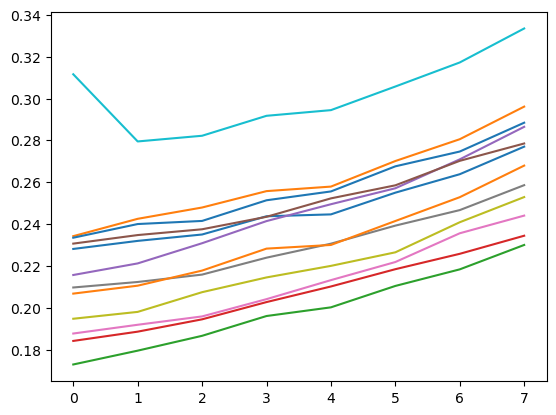

In [18]:
bins=np.arange(0,0.6,0.01)
uni = np.unique(ret3_8[['comp','col']])
for u in uni:
   tmp=ret3_8[ret3_8[['comp','col']]==u]
   plt.plot(tmp['tdac'], tmp['quick_th'], '-', label=u)
#plt.legend()

### 4. VNRegC=IPRegCasc=5

2024-06-04 17:27:08,266 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/tdac07/20240604_171549_th_hit.h5
2024-06-04 17:27:08,274 - root - [INFO    ] (MainThread) 0.00s hit=117128/117128 event=117128 ts=20700/20700
2024-06-04 17:27:08,274 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/tdac07/20240604_171549_th_hit.h5
2024-06-04 17:27:08,293 - root - [INFO    ] (MainThread) pix=(3, 0) (0, 3) 15
2024-06-04 17:27:08,325 - root - [INFO    ] (MainThread) pix=(3, 1) (0, 3) 15


2024-06-04 17:27:08,362 - root - [INFO    ] (MainThread) pix=(3, 2) (0, 3) 19
2024-06-04 17:27:08,398 - root - [INFO    ] (MainThread) pix=(3, 3) (0, 3) 19
2024-06-04 17:27:08,429 - root - [INFO    ] (MainThread) pix=(3, 4) (0, 3) 17
2024-06-04 17:27:08,464 - root - [INFO    ] (MainThread) pix=(3, 5) (0, 3) 17


0.01s 647748/647748 hit=117128 ts=20700 trig=0
/home/thirono/cernbox/clicfast2022/tdac07/20240604_171549_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'cols')
['tdac', 'cols'] [(0, 3) (1, 3) (2, 3) (3, 3) (4, 3) (5, 3) (6, 3) (7, 3)]


2024-06-04 17:27:08,496 - root - [INFO    ] (MainThread) pix=(3, 6) (0, 3) 19
2024-06-04 17:27:08,527 - root - [INFO    ] (MainThread) pix=(3, 7) (0, 3) 18
2024-06-04 17:27:08,559 - root - [INFO    ] (MainThread) pix=(3, 8) (0, 3) 18
2024-06-04 17:27:08,592 - root - [INFO    ] (MainThread) pix=(3, 9) (0, 3) 11
2024-06-04 17:27:08,622 - root - [INFO    ] (MainThread) pix=(3, 10) (0, 3) 15
2024-06-04 17:27:08,653 - root - [INFO    ] (MainThread) pix=(3, 11) (0, 3) 18
2024-06-04 17:27:08,691 - root - [INFO    ] (MainThread) pix=(3, 0) (1, 3) 16
2024-06-04 17:27:08,722 - root - [INFO    ] (MainThread) pix=(3, 1) (1, 3) 15
2024-06-04 17:27:08,753 - root - [INFO    ] (MainThread) pix=(3, 2) (1, 3) 19
2024-06-04 17:27:08,784 - root - [INFO    ] (MainThread) pix=(3, 3) (1, 3) 19
2024-06-04 17:27:08,817 - root - [INFO    ] (MainThread) pix=(3, 4) (1, 3) 18
2024-06-04 17:27:08,850 - root - [INFO    ] (MainThread) pix=(3, 5) (1, 3) 17
2024-06-04 17:27:08,881 - root - [INFO    ] (MainThread) pix=(

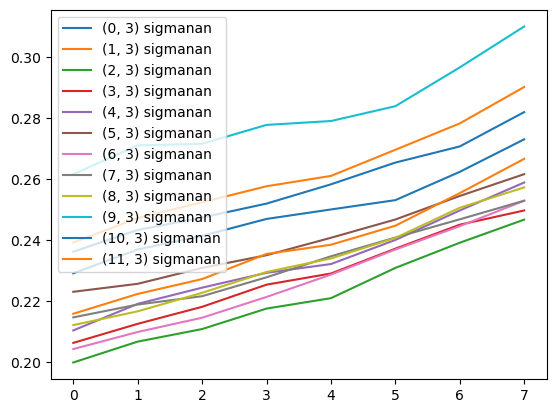

In [24]:
fname = flist[4]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
retCasc, scurvesCasc = data_loader.get_scurves(dat, param, True, inj_n=inj_n, outdir=fraw[:-8], return_data=True)

bins=np.arange(0,0.6,0.01)
uni = np.unique(retCasc[['comp','col']])
for u in uni:
   tmp=retCasc[retCasc[['comp','col']]==u]
   plt.plot(tmp['tdac'], tmp['quick_th'], '-', label='{} sigma{}'.format(u,tmp[0]['fit'][2]))
plt.legend()


### 5. HV -150V

2024-06-04 17:35:27,948 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/tdac07/20240604_173312_th_hit.h5
2024-06-04 17:35:27,956 - root - [INFO    ] (MainThread) 0.00s hit=111806/111806 event=111806 ts=20300/20300
2024-06-04 17:35:27,957 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/tdac07/20240604_173312_th_hit.h5
2024-06-04 17:35:27,976 - root - [INFO    ] (MainThread) pix=(3, 0) (0, 3) 14
2024-06-04 17:35:28,007 - root - [INFO    ] (MainThread) pix=(3, 1) (0, 3) 13


2024-06-04 17:35:28,036 - root - [INFO    ] (MainThread) pix=(3, 2) (0, 3) 17
2024-06-04 17:35:28,067 - root - [INFO    ] (MainThread) pix=(3, 3) (0, 3) 17
2024-06-04 17:35:28,099 - root - [INFO    ] (MainThread) pix=(3, 4) (0, 3) 16
2024-06-04 17:35:28,130 - root - [INFO    ] (MainThread) pix=(3, 5) (0, 3) 15


0.01s 619936/619936 hit=111806 ts=20300 trig=0
/home/thirono/cernbox/clicfast2022/tdac07/20240604_173312_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'cols')
['tdac', 'cols'] [(0, 3) (1, 3) (2, 3) (3, 3) (4, 3) (5, 3) (6, 3) (7, 3)]


2024-06-04 17:35:28,161 - root - [INFO    ] (MainThread) pix=(3, 6) (0, 3) 17
2024-06-04 17:35:28,191 - root - [INFO    ] (MainThread) pix=(3, 7) (0, 3) 16
2024-06-04 17:35:28,223 - root - [INFO    ] (MainThread) pix=(3, 8) (0, 3) 17
2024-06-04 17:35:28,254 - root - [INFO    ] (MainThread) pix=(3, 9) (0, 3) 9
2024-06-04 17:35:28,285 - root - [INFO    ] (MainThread) pix=(3, 10) (0, 3) 14
2024-06-04 17:35:28,316 - root - [INFO    ] (MainThread) pix=(3, 11) (0, 3) 16
2024-06-04 17:35:28,351 - root - [INFO    ] (MainThread) pix=(3, 0) (1, 3) 15
2024-06-04 17:35:28,383 - root - [INFO    ] (MainThread) pix=(3, 1) (1, 3) 14
2024-06-04 17:35:28,413 - root - [INFO    ] (MainThread) pix=(3, 2) (1, 3) 18
2024-06-04 17:35:28,445 - root - [INFO    ] (MainThread) pix=(3, 3) (1, 3) 17
2024-06-04 17:35:28,477 - root - [INFO    ] (MainThread) pix=(3, 4) (1, 3) 17
2024-06-04 17:35:28,509 - root - [INFO    ] (MainThread) pix=(3, 5) (1, 3) 15
2024-06-04 17:35:28,540 - root - [INFO    ] (MainThread) pix=(3

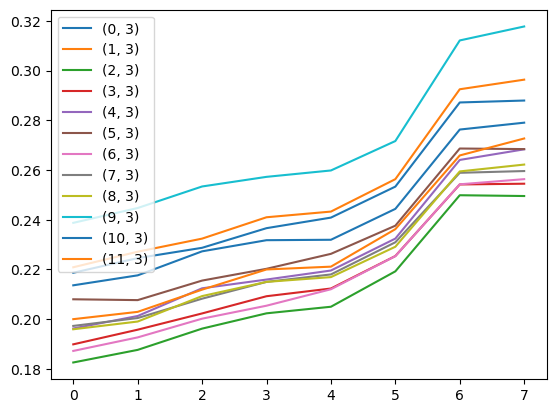

In [27]:
fname = flist[5]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
retCasc, scurvesCasc = data_loader.get_scurves(dat, param, True, inj_n=inj_n, outdir=fraw[:-8], return_data=True)

bins=np.arange(0,0.6,0.01)
uni = np.unique(retCasc[['comp','col']])
for u in uni:
   tmp=retCasc[retCasc[['comp','col']]==u]
   plt.plot(tmp['tdac'], tmp['quick_th'], '-', label='{}'.format(u))
plt.legend()

### 6. HV -150V all small pixs

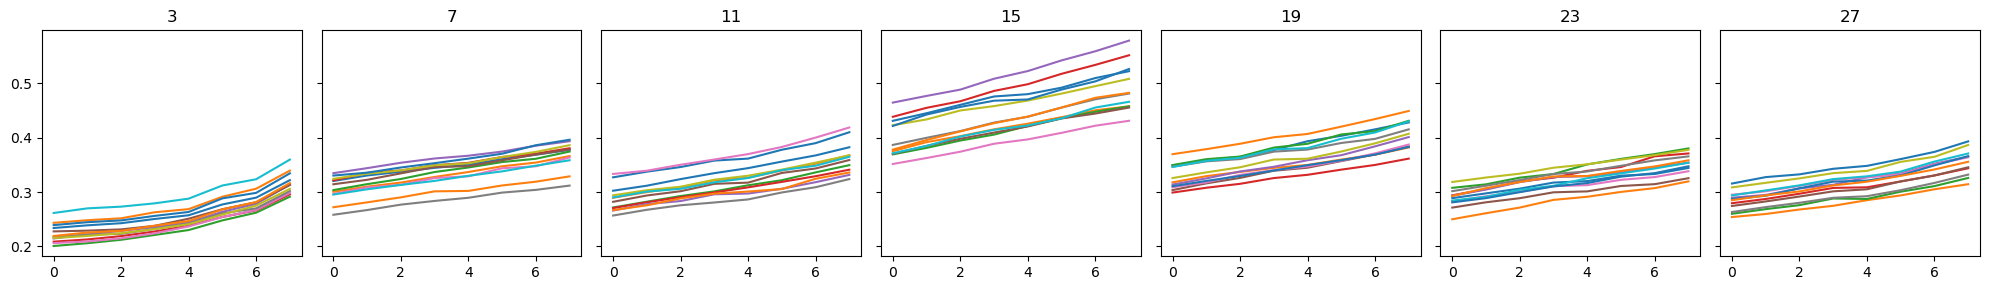

In [41]:
fname = flist[6]
if False:
    fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

    data_loader.analyze(fraw, fhit)
    dat = data_loader.get_all_data(fhit)
    param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
    inj_n = extra_param['inj.REPEAT']
    ret8, scurves8 = data_loader.get_scurves(dat, param, True, inj_n=inj_n, outdir=fraw[:-8], return_data=True)

fig, ax = plt.subplots(ncols=7, figsize=[20, 3],sharey=True)
bins=np.arange(0,0.6,0.01)
uni = np.unique(ret8[['comp','col']])
for u in uni:
    i=u['col']//4
    tmp=ret8[ret8[['comp','col']]==u]
    ax[i].plot(tmp['tdac'], tmp['quick_th'], '-', label='{}'.format(u))
    ax[i].set_title(u['col'])
fig.tight_layout()
#plt.legend()

(0, 23)
(1, 23)
(2, 23)
(3, 23)
(4, 23)
(5, 23)
(6, 23)
(7, 23)
(8, 23)
(9, 23)
(10, 23)
(11, 23)


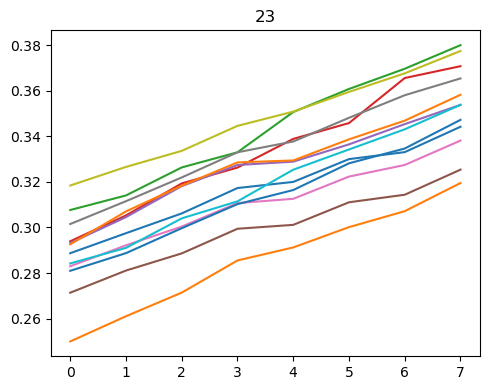

In [67]:
fname = flist[6]
if False:
    fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

    data_loader.analyze(fraw, fhit)
    dat = data_loader.get_all_data(fhit)
    param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
    inj_n = extra_param['inj.REPEAT']
    ret8, scurves8 = data_loader.get_scurves(dat, param, True, inj_n=inj_n, outdir=fraw[:-8], return_data=True)

fig, ax = plt.subplots(ncols=1, figsize=[5, 4],sharey=True)
ax = [ax]
bins=np.arange(0,0.6,0.01)
uni = np.unique(ret8[['comp','col']])
i=0
for u in uni:
    if u['col']!=23:
        continue
    print(u)
    tmp=ret8[ret8[['comp','col']]==u]
    ax[i].plot(tmp['tdac'], tmp['quick_th'], '-', label='{}'.format(u))
    ax[i].set_title(u['col'])
fig.tight_layout()

In [66]:
ret8

array([( 3,  0, [nan, nan, nan, nan, nan, nan], 0.23392858, 0,  3),
       ( 3,  1, [nan, nan, nan, nan, nan, nan], 0.2434375 , 0,  3),
       ( 3,  2, [nan, nan, nan, nan, nan, nan], 0.20088235, 0,  3),
       ( 3,  3, [nan, nan, nan, nan, nan, nan], 0.20887096, 0,  3),
       ( 3,  4, [nan, nan, nan, nan, nan, nan], 0.21472223, 0,  3),
       ( 3,  5, [nan, nan, nan, nan, nan, nan], 0.22768292, 0,  3),
       ( 3,  6, [nan, nan, nan, nan, nan, nan], 0.20617647, 0,  3),
       ( 3,  7, [nan, nan, nan, nan, nan, nan], 0.21743903, 0,  3),
       ( 3,  8, [nan, nan, nan, nan, nan, nan], 0.21551283, 0,  3),
       ( 3,  9, [nan, nan, nan, nan, nan, nan], 0.26148647, 0,  3),
       ( 3, 10, [nan, nan, nan, nan, nan, nan], 0.23924242, 0,  3),
       ( 3, 11, [nan, nan, nan, nan, nan, nan], 0.21928571, 0,  3),
       ( 7,  0, [nan, nan, nan, nan, nan, nan], 0.32023808, 0,  7),
       ( 7,  1, [nan, nan, nan, nan, nan, nan], 0.30042857, 0,  7),
       ( 7,  2, [nan, nan, nan, nan, nan, nan], 

### 7. VDACCaspP/N for simulated values 'N', 106/256. * 1.8, 'P', 114/256.*1.8 
('N', 0.7453125, 'P', 0.8015625000000001)

2024-06-04 18:05:29,250 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/tdac07/20240604_180255_th_hit.h5
2024-06-04 18:05:29,284 - root - [INFO    ] (MainThread) 0.03s hit=819687/819687 event=819687 ts=57200/57200
2024-06-04 18:05:29,285 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/tdac07/20240604_180255_th_hit.h5
2024-06-04 18:05:29,311 - root - [INFO    ] (MainThread) pix=(3, 0) (0, 3) 9
2024-06-04 18:05:29,342 - root - [INFO    ] (MainThread) pix=(3, 1) (0, 3) 9
2024-06-04 18:05:29,373 - root - [INFO    ] (MainThread) pix=(3, 2) (0, 3) 9
2024-06-04 18:05:29,404 - root - [INFO    ] (MainThread) pix=(3, 3) (0, 3) 9
2024-06-04 18:05:29,435 - root - [INFO    ] (MainThread) pix=(3, 4) (0, 3) 9


0.05s 4270060/4270060 hit=819687 ts=57200 trig=0
/home/thirono/cernbox/clicfast2022/tdac07/20240604_180255_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'cols')
['tdac', 'cols'] [(0,  3) (0,  7) (0, 11) (0, 15) (0, 19) (0, 23) (0, 27) (1,  3) (1,  7)
 (1, 11) (1, 15) (1, 19) (1, 23) (1, 27) (2,  3) (2,  7) (2, 11) (2, 15)
 (2, 19) (2, 23) (2, 27) (3,  3) (3,  7) (3, 11) (3, 15) (3, 19) (3, 23)
 (3, 27) (4,  3) (4,  7) (4, 11) (4, 15) (4, 19) (4, 23) (4, 27) (5,  3)
 (5,  7) (5, 11) (5, 15) (5, 19) (5, 23) (5, 27) (6,  3) (6,  7) (6, 11)
 (6, 15) (6, 19) (6, 23) (6, 27) (7,  3) (7,  7) (7, 11) (7, 15) (7, 19)
 (7, 23) (7, 27)]


2024-06-04 18:05:29,465 - root - [INFO    ] (MainThread) pix=(3, 5) (0, 3) 9
2024-06-04 18:05:29,496 - root - [INFO    ] (MainThread) pix=(3, 6) (0, 3) 9
2024-06-04 18:05:29,527 - root - [INFO    ] (MainThread) pix=(3, 7) (0, 3) 9
2024-06-04 18:05:29,557 - root - [INFO    ] (MainThread) pix=(3, 8) (0, 3) 9
2024-06-04 18:05:29,587 - root - [INFO    ] (MainThread) pix=(3, 9) (0, 3) 9
2024-06-04 18:05:29,617 - root - [INFO    ] (MainThread) pix=(3, 10) (0, 3) 9
2024-06-04 18:05:29,648 - root - [INFO    ] (MainThread) pix=(3, 11) (0, 3) 9
2024-06-04 18:05:29,684 - root - [INFO    ] (MainThread) pix=(7, 0) (0, 7) 11
2024-06-04 18:05:29,713 - root - [INFO    ] (MainThread) pix=(7, 1) (0, 7) 11
2024-06-04 18:05:29,741 - root - [INFO    ] (MainThread) pix=(7, 2) (0, 7) 11
2024-06-04 18:05:29,770 - root - [INFO    ] (MainThread) pix=(7, 3) (0, 7) 11
2024-06-04 18:05:29,798 - root - [INFO    ] (MainThread) pix=(7, 4) (0, 7) 11
2024-06-04 18:05:29,827 - root - [INFO    ] (MainThread) pix=(7, 5) (

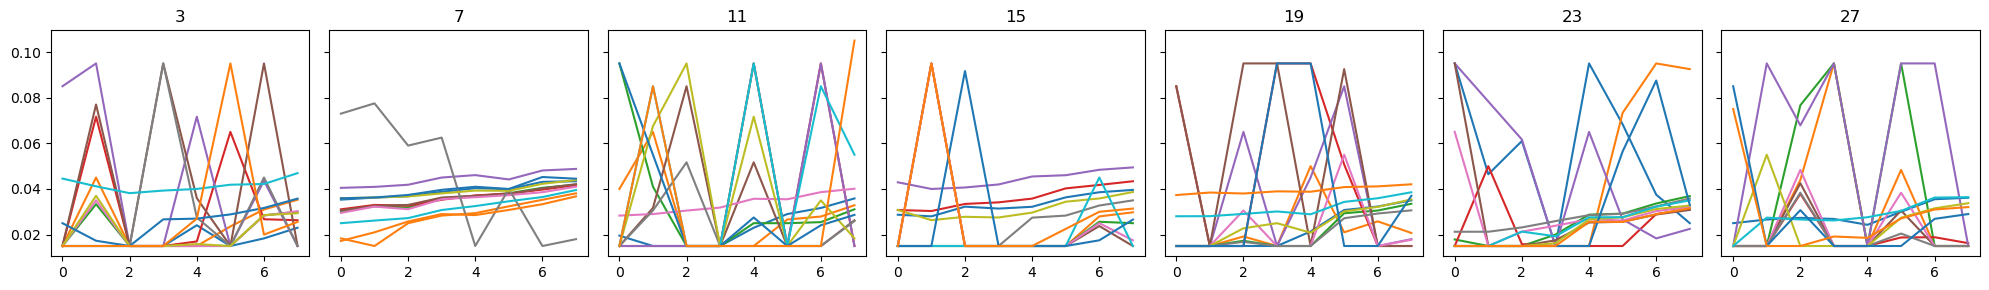

In [54]:
fname = flist[7]
if False:
    fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

    data_loader.analyze(fraw, fhit)
    dat = data_loader.get_all_data(fhit)
    param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
    inj_n = extra_param['inj.REPEAT']
    retCasc, scurvesCasc = data_loader.get_scurves(dat, param, True, inj_n=inj_n, outdir=fraw[:-8], return_data=True)

fig, ax = plt.subplots(ncols=7, figsize=[20, 3],sharey=True)
bins=np.arange(0,0.6,0.01)
uni = np.unique(retCasc[['comp','col']])
for u in uni:
    i = u['col'] // 4
    tmp=retCasc[retCasc[['comp','col']]==u]
    ax[i].plot(tmp['tdac'], tmp['quick_th'], '-', label='{}'.format(u))
    ax[i].set_title(u['col'])
fig.tight_layout()

### col23 IPDAC12

2024-06-04 18:21:41,865 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/tdac07/20240604_181855_th_hit.h5
2024-06-04 18:21:41,873 - root - [INFO    ] (MainThread) 0.00s hit=89067/89067 event=89067 ts=13900/13900
2024-06-04 18:21:41,873 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/tdac07/20240604_181855_th_hit.h5
2024-06-04 18:21:41,890 - root - [INFO    ] (MainThread) pix=(23, 0) (0,) 11
2024-06-04 18:21:41,919 - root - [INFO    ] (MainThread) pix=(23, 1) (0,) 13


2024-06-04 18:21:41,949 - root - [INFO    ] (MainThread) pix=(23, 2) (0,) 10
2024-06-04 18:21:41,981 - root - [INFO    ] (MainThread) pix=(23, 3) (0,) 11
2024-06-04 18:21:42,008 - root - [INFO    ] (MainThread) pix=(23, 4) (0,) 11
2024-06-04 18:21:42,036 - root - [INFO    ] (MainThread) pix=(23, 5) (0,) 12


0.01s 487041/487041 hit=89067 ts=13900 trig=0
/home/thirono/cernbox/clicfast2022/tdac07/20240604_181855_th
('scan_param_id', 'timestamp', 'inj', 'tdac')
['tdac'] [(0,) (1,) (2,) (3,) (4,) (5,) (6,) (7,)]


2024-06-04 18:21:42,066 - root - [INFO    ] (MainThread) pix=(23, 6) (0,) 12
2024-06-04 18:21:42,096 - root - [INFO    ] (MainThread) pix=(23, 7) (0,) 11
2024-06-04 18:21:42,124 - root - [INFO    ] (MainThread) pix=(23, 8) (0,) 10
2024-06-04 18:21:42,155 - root - [INFO    ] (MainThread) pix=(23, 9) (0,) 12
2024-06-04 18:21:42,185 - root - [INFO    ] (MainThread) pix=(23, 10) (0,) 11
2024-06-04 18:21:42,212 - root - [INFO    ] (MainThread) pix=(23, 11) (0,) 11
2024-06-04 18:21:42,243 - root - [INFO    ] (MainThread) pix=(23, 0) (1,) 10
2024-06-04 18:21:42,274 - root - [INFO    ] (MainThread) pix=(23, 1) (1,) 12
2024-06-04 18:21:42,303 - root - [INFO    ] (MainThread) pix=(23, 2) (1,) 10
2024-06-04 18:21:42,334 - root - [INFO    ] (MainThread) pix=(23, 3) (1,) 10
2024-06-04 18:21:42,365 - root - [INFO    ] (MainThread) pix=(23, 4) (1,) 10
2024-06-04 18:21:42,395 - root - [INFO    ] (MainThread) pix=(23, 5) (1,) 11
2024-06-04 18:21:42,422 - root - [INFO    ] (MainThread) pix=(23, 6) (1,) 

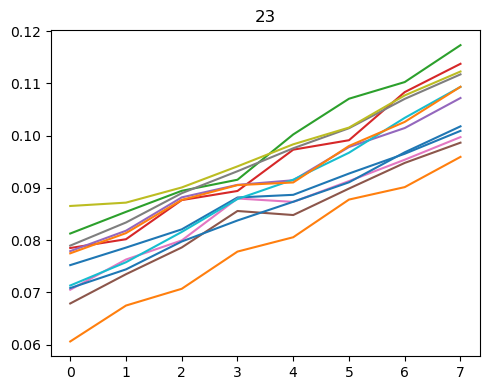

In [58]:
fname = flist[8]
if True:
    fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

    data_loader.analyze(fraw, fhit)
    dat = data_loader.get_all_data(fhit)
    param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
    inj_n = extra_param['inj.REPEAT']
    retCasc, scurvesCasc = data_loader.get_scurves(dat, param, True, inj_n=inj_n, outdir=fraw[:-8], return_data=True)

fig, ax = plt.subplots(ncols=1, figsize=[5, 4],sharey=True)
ax = [ax]
bins=np.arange(0,0.6,0.01)
uni = np.unique(retCasc[['comp','col']])
i=0
for u in uni:
    tmp=retCasc[retCasc[['comp','col']]==u]
    ax[i].plot(tmp['tdac'], tmp['quick_th'], '-', label='{}'.format(u))
    ax[i].set_title(u['col'])
fig.tight_layout()

### IPDAC=10

2024-06-05 15:22:07,526 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/tdac07/20240604_182406_th_hit.h5
2024-06-05 15:22:07,534 - root - [INFO    ] (MainThread) 0.00s hit=89948/89948 event=89948 ts=13300/13300
2024-06-05 15:22:07,534 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/tdac07/20240604_182406_th_hit.h5
2024-06-05 15:22:07,552 - root - [INFO    ] (MainThread) pix=(23, 0) (0,) 11
2024-06-05 15:22:07,581 - root - [INFO    ] (MainThread) pix=(23, 1) (0,) 13
2024-06-05 15:22:07,613 - root - [INFO    ] (MainThread) pix=(23, 2) (0,) 10
2024-06-05 15:22:07,643 - root - [INFO    ] (MainThread) pix=(23, 3) (0,) 10
2024-06-05 15:22:07,678 - root - [INFO    ] (MainThread) pix=(23, 4) (0,) 10
2024-06-05 15:22:07,708 - root - [INFO    ] (MainThread) pix=(23, 5) (0,) 12


0 20240604_154659_th_scan.h5
1 20240604_161247_th_scan.h5
2 20240604_164802_th_scan.h5
3 20240604_165635_th_scan.h5
4 20240604_171549_th_scan.h5
5 20240604_173312_th_scan.h5
6 20240604_174029_th_scan.h5
7 20240604_180255_th_scan.h5
8 20240604_181855_th_scan.h5
9 20240604_182406_th_scan.h5
0.01s 489649/489649 hit=89948 ts=13300 trig=0
/home/thirono/cernbox/clicfast2022/tdac07/20240604_182406_th
('scan_param_id', 'timestamp', 'inj', 'tdac')
['tdac'] [(0,) (1,) (2,) (3,) (4,) (5,) (6,) (7,)]


2024-06-05 15:22:07,737 - root - [INFO    ] (MainThread) pix=(23, 6) (0,) 12
2024-06-05 15:22:07,769 - root - [INFO    ] (MainThread) pix=(23, 7) (0,) 10
2024-06-05 15:22:07,804 - root - [INFO    ] (MainThread) pix=(23, 8) (0,) 10
2024-06-05 15:22:07,834 - root - [INFO    ] (MainThread) pix=(23, 9) (0,) 12
2024-06-05 15:22:07,863 - root - [INFO    ] (MainThread) pix=(23, 10) (0,) 11
2024-06-05 15:22:07,891 - root - [INFO    ] (MainThread) pix=(23, 11) (0,) 10
2024-06-05 15:22:07,924 - root - [INFO    ] (MainThread) pix=(23, 0) (1,) 11
2024-06-05 15:22:07,951 - root - [INFO    ] (MainThread) pix=(23, 1) (1,) 13
2024-06-05 15:22:07,979 - root - [INFO    ] (MainThread) pix=(23, 2) (1,) 11
2024-06-05 15:22:08,005 - root - [INFO    ] (MainThread) pix=(23, 3) (1,) 11
2024-06-05 15:22:08,031 - root - [INFO    ] (MainThread) pix=(23, 4) (1,) 11
2024-06-05 15:22:08,057 - root - [INFO    ] (MainThread) pix=(23, 5) (1,) 12
2024-06-05 15:22:08,092 - root - [INFO    ] (MainThread) pix=(23, 6) (1,) 

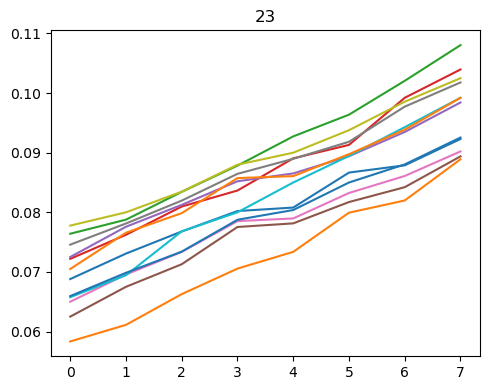

In [29]:
datdir = '/home/thirono/cernbox/clicfast2022/tdac07'

flist =[]
for fname in np.sort(os.listdir(datdir)):
    if fname[-7:] == 'scan.h5':
        flist.append(fname)
for i, fname in enumerate(flist):
    print(i, fname)

fname = flist[9]
if True:
    fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

    data_loader.analyze(fraw, fhit)
    dat = data_loader.get_all_data(fhit)
    param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
    inj_n = extra_param['inj.REPEAT']
    ret10, scurves10 = data_loader.get_scurves(dat, param, True, inj_n=inj_n, outdir=fraw[:-8], return_data=True)

fig, ax = plt.subplots(ncols=1, figsize=[5, 4],sharey=True)
ax = [ax]
bins=np.arange(0,0.6,0.01)
uni = np.unique(ret10[['comp','col']])
i=0
for u in uni:
    tmp=ret10[ret10[['comp','col']]==u]
    ax[i].plot(tmp['tdac'], tmp['quick_th'], '-', label='{}'.format(u))
    ax[i].set_title(u['col'])
#fig.legend()
fig.tight_layout()


In [73]:
ret10[['comp','quick_th']][ret10['tdac']==0]

array([( 0, 0.06880282), ( 1, 0.05833333), ( 2, 0.07640351),
       ( 3, 0.07219298), ( 4, 0.07250001), ( 5, 0.0625    ),
       ( 6, 0.065     ), ( 7, 0.07457447), ( 8, 0.07776923),
       ( 9, 0.06575471), (10, 0.0659434 ), (11, 0.07049296)],
      dtype={'names': ['comp', 'quick_th'], 'formats': ['<i4', '<f4'], 'offsets': [4, 32], 'itemsize': 37})

In [77]:
ret10[['comp','quick_th']][ret10['tdac']==7]

array([( 0, 0.09230158), ( 1, 0.0888961 ), ( 2, 0.10804348),
       ( 3, 0.10395833), ( 4, 0.09842466), ( 5, 0.08938356),
       ( 6, 0.09021739), ( 7, 0.10178571), ( 8, 0.1025    ),
       ( 9, 0.09921052), (10, 0.09254098), (11, 0.09921052)],
      dtype={'names': ['comp', 'quick_th'], 'formats': ['<i4', '<f4'], 'offsets': [4, 32], 'itemsize': 37})

## Tune TDAC

2024-06-05 19:27:16,925 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/tuned/20240605_161115_th_hit.h5
2024-06-05 19:27:16,994 - root - [INFO    ] (MainThread) 0.06s hit=1648086/1648086 event=1648086 ts=291100/291100
2024-06-05 19:27:16,996 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/tuned/20240605_161115_th_hit.h5


0 20240605_150813_th_scan.h5
1 20240605_161115_th_scan.h5
0.11s 9113830/9113830 hit=1648086 ts=291100 trig=0


2024-06-05 19:27:17,037 - root - [INFO    ] (MainThread) pix=(3, 0) (0, 3) 14
2024-06-05 19:27:17,073 - root - [INFO    ] (MainThread) pix=(3, 1) (0, 3) 13
2024-06-05 19:27:17,105 - root - [INFO    ] (MainThread) pix=(3, 2) (0, 3) 19
2024-06-05 19:27:17,136 - root - [INFO    ] (MainThread) pix=(3, 3) (0, 3) 18
2024-06-05 19:27:17,166 - root - [INFO    ] (MainThread) pix=(3, 4) (0, 3) 17
2024-06-05 19:27:17,197 - root - [INFO    ] (MainThread) pix=(3, 5) (0, 3) 14


/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/tuned/20240605_161115_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'cols')
['tdac', 'cols'] [(0,  3) (0,  4) (0,  7) (0,  8) (0, 11) (0, 12) (0, 15) (0, 16) (0, 19)
 (0, 20) (0, 23) (0, 24) (0, 27) (1,  3) (1,  4) (1,  7) (1,  8) (1, 11)
 (1, 12) (1, 15) (1, 16) (1, 19) (1, 20) (1, 23) (1, 24) (1, 27) (2,  3)
 (2,  4) (2,  7) (2,  8) (2, 11) (2, 12) (2, 15) (2, 16) (2, 19) (2, 20)
 (2, 23) (2, 24) (2, 27) (3,  3) (3,  4) (3,  7) (3,  8) (3, 11) (3, 12)
 (3, 15) (3, 16) (3, 19) (3, 20) (3, 23) (3, 24) (3, 27) (4,  3) (4,  4)
 (4,  7) (4,  8) (4, 11) (4, 12) (4, 15) (4, 16) (4, 19) (4, 20) (4, 23)
 (4, 24) (4, 27) (5,  3) (5,  4) (5,  7) (5,  8) (5, 11) (5, 12) (5, 15)
 (5, 16) (5, 19) (5, 20) (5, 23) (5, 24) (5, 27) (6,  3) (6,  4) (6,  7)
 (6,  8) (6, 11) (6, 12) (6, 15) (6, 16) (6, 19) (6, 20) (6, 23) (6, 24)
 (6, 27) (7,  3) (7,  4) (7,  7) (7,  8) (7, 11) (7, 12) (7, 15) (7, 16)
 (7, 19) (7, 20) (7, 23) (7, 24) (7, 27)]


2024-06-05 19:27:17,227 - root - [INFO    ] (MainThread) pix=(3, 6) (0, 3) 18
2024-06-05 19:27:17,258 - root - [INFO    ] (MainThread) pix=(3, 7) (0, 3) 15
2024-06-05 19:27:17,288 - root - [INFO    ] (MainThread) pix=(3, 8) (0, 3) 17
2024-06-05 19:27:17,319 - root - [INFO    ] (MainThread) pix=(3, 9) (0, 3) 9
2024-06-05 19:27:17,349 - root - [INFO    ] (MainThread) pix=(3, 10) (0, 3) 13
2024-06-05 19:27:17,379 - root - [INFO    ] (MainThread) pix=(3, 11) (0, 3) 17
2024-06-05 19:27:17,420 - root - [INFO    ] (MainThread) pix=(4, 0) (0, 4) 14
2024-06-05 19:27:17,449 - root - [INFO    ] (MainThread) pix=(4, 1) (0, 4) 23
2024-06-05 19:27:17,476 - root - [INFO    ] (MainThread) pix=(4, 2) (0, 4) 17
2024-06-05 19:27:17,507 - root - [INFO    ] (MainThread) pix=(4, 3) (0, 4) 17
2024-06-05 19:27:17,537 - root - [INFO    ] (MainThread) pix=(4, 4) (0, 4) 15
2024-06-05 19:27:17,568 - root - [INFO    ] (MainThread) pix=(4, 5) (0, 4) 19
2024-06-05 19:27:17,596 - root - [INFO    ] (MainThread) pix=(4

(array([0.29874998, 0.24987179, 0.31666666, 0.30264705, 0.30294117,
        0.28      , 0.2901515 , 0.315     , 0.3285135 , 0.29094595,
        0.28794116, 0.3038889 , 0.30772728, 0.26378787, 0.33014286,
        0.31208333, 0.31289473, 0.2930645 , 0.30613637, 0.32725805,
        0.34109756, 0.3026316 , 0.30155173, 0.31583333, 0.30648148,
        0.26264703, 0.33333334, 0.31183332, 0.31093222, 0.29560605,
        0.30333334, 0.3143617 , 0.3433871 , 0.30663267, 0.30025   ,
        0.31103176, 0.3045122 , 0.26725805, 0.32026315, 0.31396553,
        0.315     , 0.2930769 , 0.301     , 0.3212069 , 0.33121622,
        0.30235294, 0.2980303 , 0.3167143 , 0.315     , 0.28274193,
        0.343125  , 0.33277777, 0.32241935, 0.30051723, 0.31115386,
        0.33458334, 0.34361112, 0.3196875 , 0.31051725, 0.32235295,
        0.32759258, 0.29444444, 0.3586111 , 0.34233335, 0.33240741,
        0.30875   , 0.31833333, 0.3459091 , 0.35722223, 0.3313158 ,
        0.32166666, 0.33642858, 0.334     , 0.30

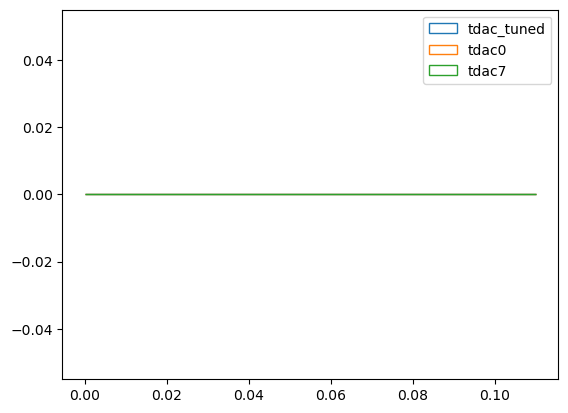

In [82]:
datdir = '/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/tuned'

flist =[]
for fname in np.sort(os.listdir(datdir)):
    if fname[-7:] == 'scan.h5':
        flist.append(fname)
for i, fname in enumerate(flist):
    print(i, fname)

fname = flist[1]
if True:
    fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

    data_loader.analyze(fraw, fhit)
    dat = data_loader.get_all_data(fhit)
    param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT', 'CONF.VDACTh'])
    inj_n = extra_param['inj.REPEAT']
    rettuned, scurvestuned = data_loader.get_scurves(dat, param, True, inj_n=inj_n, outdir=fraw[:-8], return_data=True)

#fig, ax = plt.subplots(ncols=1, figsize=[5, 4],sharey=True)
#ax = [ax]
bins=np.arange(0,0.12,0.01)
#uni = np.unique(rettuned[['comp','col']])
#i=0
#for u in uni:
#    tmp=rettuned[rettuned[['comp','col']]==u]
#    ax[i].plot(tmp['quick_th'], '-', label='{}'.format(u))
#    ax[i].set_title(u['col'])
##fig.legend()
#fig.tight_layout()
plt.hist(rettuned['quick_th'][rettuned['col']==23], bins=bins, histtype='step', label='tdac_tuned')
#plt.hist(ret10['quick_th'][(ret10['col']==23)&(ret10['tdac']==0)],bins=bins,histtype='step', label='tdac0')
#plt.hist(ret10['quick_th'][(ret10['col']==23)&(ret10['tdac']==7)],bins=bins,histtype='step', label='tdac7')
#plt.legend()

#rettuned['quick_th'][rettuned['col']==23],  hex(int(extra_param['CONF.VDACTh'],2))

### all small pix

In [88]:
datdir = '/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/tuned'

flist =[]
for fname in np.sort(os.listdir(datdir)):
    if fname[-7:] == 'scan.h5':
        flist.append(fname)
for i, fname in enumerate(flist):
    print(i, fname)

fname = flist[0]
if True:
    fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

    data_loader.analyze(fraw, fhit)
    dat = data_loader.get_all_data(fhit)
    param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
    inj_n = extra_param['inj.REPEAT']
    ret, scurves = data_loader.get_scurves(dat, param, True, inj_n=inj_n, outdir=fraw[:-8], return_data=True)


fname = flist[1]
if True:
    fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

    data_loader.analyze(fraw, fhit)
    dat = data_loader.get_all_data(fhit)
    param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
    inj_n = extra_param['inj.REPEAT']
    ret10, scurves10 = data_loader.get_scurves(dat, param, True, inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-05 20:22:24,672 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/tuned/20240605_200516_th_hit.h5
2024-06-05 20:22:24,681 - root - [INFO    ] (MainThread) 0.01s hit=125910/125910 event=125910 ts=21500/21500
2024-06-05 20:22:24,682 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/tuned/20240605_200516_th_hit.h5
2024-06-05 20:22:24,699 - root - [INFO    ] (MainThread) pix=(3, 0) (3,) 9
2024-06-05 20:22:24,730 - root - [INFO    ] (MainThread) pix=(3, 1) (3,) 8
2024-06-05 20:22:24,758 - root - [INFO    ] (MainThread) pix=(3, 2) (3,) 11
2024-06-05 20:22:24,786 - root - [INFO    ] (MainThread) pix=(3, 3) (3,) 10
2024-06-05 20:22:24,817 - root - [INFO    ] (MainThread) pix=(3, 4) (3,) 9


2024-06-05 20:22:24,846 - root - [INFO    ] (MainThread) pix=(3, 5) (3,) 9


0 20240605_200516_th_scan.h5
1 20240605_202047_th_scan.h5
0.01s 694056/694056 hit=125910 ts=21500 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/tuned/20240605_200516_th
('scan_param_id', 'timestamp', 'inj', 'cols')
['cols'] [( 3,) ( 4,) ( 7,) ( 8,) (11,) (12,) (15,) (16,) (19,) (20,) (23,) (24,)
 (27,)]


2024-06-05 20:22:24,876 - root - [INFO    ] (MainThread) pix=(3, 6) (3,) 10
2024-06-05 20:22:24,906 - root - [INFO    ] (MainThread) pix=(3, 7) (3,) 10
2024-06-05 20:22:24,937 - root - [INFO    ] (MainThread) pix=(3, 8) (3,) 10
2024-06-05 20:22:24,967 - root - [INFO    ] (MainThread) pix=(3, 9) (3,) 8
2024-06-05 20:22:25,002 - root - [INFO    ] (MainThread) pix=(3, 10) (3,) 9
2024-06-05 20:22:25,036 - root - [INFO    ] (MainThread) pix=(3, 11) (3,) 9
2024-06-05 20:22:25,071 - root - [INFO    ] (MainThread) pix=(4, 0) (4,) 9
2024-06-05 20:22:25,101 - root - [INFO    ] (MainThread) pix=(4, 1) (4,) 11
2024-06-05 20:22:25,131 - root - [INFO    ] (MainThread) pix=(4, 2) (4,) 9
2024-06-05 20:22:25,161 - root - [INFO    ] (MainThread) pix=(4, 3) (4,) 9
2024-06-05 20:22:25,190 - root - [INFO    ] (MainThread) pix=(4, 4) (4,) 9
2024-06-05 20:22:25,221 - root - [INFO    ] (MainThread) pix=(4, 5) (4,) 10
2024-06-05 20:22:25,251 - root - [INFO    ] (MainThread) pix=(4, 6) (4,) 9
2024-06-05 20:22:2

0.01s 613090/613090 hit=112297 ts=17200 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/tuned/20240605_202047_th
('scan_param_id', 'timestamp', 'inj', 'cols')
['cols'] [( 3,) ( 4,) ( 7,) ( 8,) (11,) (12,) (15,) (16,) (19,) (20,) (23,) (24,)
 (27,)]


2024-06-05 20:22:33,070 - root - [INFO    ] (MainThread) pix=(3, 6) (3,) 9
2024-06-05 20:22:33,103 - root - [INFO    ] (MainThread) pix=(3, 7) (3,) 9
2024-06-05 20:22:33,135 - root - [INFO    ] (MainThread) pix=(3, 8) (3,) 9
2024-06-05 20:22:33,167 - root - [INFO    ] (MainThread) pix=(3, 9) (3,) 9
2024-06-05 20:22:33,197 - root - [INFO    ] (MainThread) pix=(3, 10) (3,) 9
2024-06-05 20:22:33,227 - root - [INFO    ] (MainThread) pix=(3, 11) (3,) 9
2024-06-05 20:22:33,261 - root - [INFO    ] (MainThread) pix=(4, 0) (4,) 8
2024-06-05 20:22:33,295 - root - [INFO    ] (MainThread) pix=(4, 1) (4,) 9
2024-06-05 20:22:33,325 - root - [INFO    ] (MainThread) pix=(4, 2) (4,) 10
2024-06-05 20:22:33,357 - root - [INFO    ] (MainThread) pix=(4, 3) (4,) 9
2024-06-05 20:22:33,387 - root - [INFO    ] (MainThread) pix=(4, 4) (4,) 9
2024-06-05 20:22:33,428 - root - [INFO    ] (MainThread) pix=(4, 5) (4,) 10
2024-06-05 20:22:33,462 - root - [INFO    ] (MainThread) pix=(4, 6) (4,) 9
2024-06-05 20:22:33,4

(array([ 2.,  7., 26., 13., 32., 35., 27.,  9.,  2.,  3.]),
 array([0.06088235, 0.06789027, 0.07489819, 0.08190611, 0.08891403,
        0.09592195, 0.10292986, 0.10993778, 0.1169457 , 0.12395362,
        0.13096154]),
 [<matplotlib.patches.Polygon at 0x7f30ebeb7fd0>])

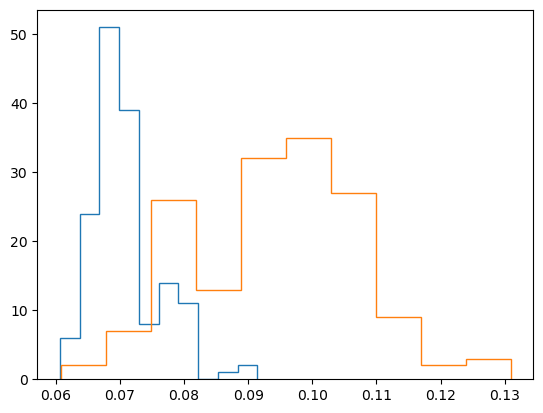

In [89]:

plt.hist(ret10['quick_th'], histtype='step')
plt.hist(ret['quick_th'], histtype='step')
